# Import

In [1]:
import os, re, json
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle, torch

# Read attention weights

In [10]:
result_path = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/model/#report_results/20230811_225905_I1_Graph_Bond_Pose_1_Seed_0_Attention_physics_D_count=64_rbf_power_reverse*/20230811_225906_GIGN_fold_2_I1_Graph_Bond_Pose_1_Seed_0_Attention_physics_D_count=64_rbf_power_reverse*/result/'
with torch.no_grad():
    with open(result_path + 'train_attentions.pickle', 'rb') as file:
        train_attention_dict = pickle.load(file, encoding='latin1')
    with open(result_path + 'val_attentions.pickle', 'rb') as file:
        val_attention_dict = pickle.load(file, encoding='latin1')
    with open(result_path + 'test_attentions.pickle', 'rb') as file:
        test_attention_dict = pickle.load(file, encoding='latin1')
print(len(train_attention_dict), len(val_attention_dict), len(test_attention_dict))
# Get an iterator for the dictionary keys
keys_iterator = iter(test_attention_dict.keys())

# Get the first key using next()
first_key = next(keys_iterator)
attention_weight = test_attention_dict[first_key][0]
epochs = len(test_attention_dict[first_key])
print(epochs, attention_weight.shape)
print(attention_weight.sum(0))

617 145 162
206 torch.Size([7, 7])
tensor([1.7500, 0.0000, 0.0000, 0.0000, 5.2500, 0.0000, 0.0000],
       device='cuda:0')


# Normalize attention weights on all samples or one sample

In [15]:
cpd, attention_dict = 'CHEMBL151958', train_attention_dict # Train example: CHEMBL151958, Test example: CHEMBL7492
def normalize_tensor_list(tensor_list):
    normalized_list = []
    for tensor in tensor_list:
        min_val = torch.min(tensor)
        max_val = torch.max(tensor)
        normalized_tensor = (tensor - min_val) / (max_val - min_val)
        normalized_list.append(normalized_tensor)
    return normalized_list

epochs = len(attention_dict[cpd])
epoch_total_attention_list, pocket_num = [], 7
for epoch in range(epochs):
    epoch_total_attention = 0
    for key, value in attention_dict.items():
        if key == cpd and value[epoch].shape[0] == pocket_num: # 
            epoch_total_attention += value[epoch].sum(0)
            epoch_total_attention_list.append(epoch_total_attention)
epoch_total_attention_list = normalize_tensor_list(epoch_total_attention_list)
pocket_epoch_attention_list = [torch.stack([tensor[i] for tensor in epoch_total_attention_list]) for i in range(pocket_num)]
print(pocket_epoch_attention_list)

[tensor([1.0000, 1.0000, 0.7730, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9388, 0.8291, 1.0000, 0.9130, 1.0000, 1.0000, 0.8571, 0.8318, 1.0000,
        1.0000, 0.9313, 0.8471, 1.0000, 0.9987, 0.8115, 1.0000, 1.0000, 1.0000,
        0.6997, 1.0000, 0.9013, 1.0000, 0.9381, 0.9166, 1.0000, 0.9427, 1.0000,
        0.8750, 0.9192, 1.0000, 1.0000, 0.9665, 1.0000, 0.9580, 1.0000, 0.8940,
        1.0000, 1.0000, 0.9810, 1.0000, 1.0000, 1.0000, 1.0000, 0.9604, 1.0000,
        1.0000, 0.9896, 1.0000, 0.9259, 0.8519, 0.9545, 0.7903, 1.0000, 0.9201,
        0.9583, 1.0000, 1.0000, 0.8885, 0.7752, 0.8749, 0.8333, 1.0000, 1.0000,
        0.9582, 0.9582, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.8279, 0.7778, 0.7762, 1.0000, 0.7194, 0.9288, 0.7857, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.7286,
        0.8621, 1.0000, 1.0000, 0.7205, 0.8460, 0.7813, 0.6864, 0.7912, 1.0000,
        0.6452, 0.8210, 0.6560, 0.8964,

# Visualize one ligand

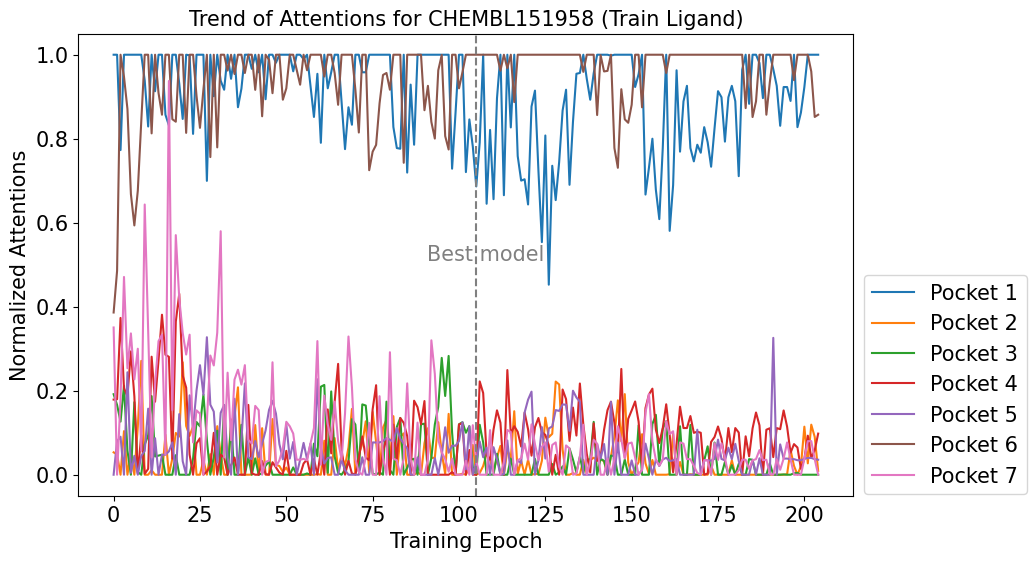

In [17]:
import matplotlib.pyplot as plt

# 创建一个图形窗口
fig, ax = plt.subplots(figsize=(10, 6))
fontsize = 15

# 绘制每个张量的走势，并添加标签
for i, tensor in enumerate(pocket_epoch_attention_list):
    label = f'Pocket {i+1}'
    ax.plot(tensor.detach().cpu().numpy(), label=label)

# 找到最大值对应的索引
max_index = len(pocket_epoch_attention_list[0])
# 在x=x最大值减100处绘制竖虚线
ax.axvline(x=max_index - 100, color='gray', linestyle='--')
# 标注“Best model”文本
ax.text(1.025*(max_index - 100), 0.5, "Best model", fontsize=fontsize, color='gray', rotation=0, va='bottom', ha='center')

# 设置图例的位置（位于图片右边居中）
legend = ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1, 0.5))

# 设置图形标题和轴标签
ax.set_title(f"Trend of Attentions for {cpd} (Train Ligand)", fontsize=fontsize)
ax.set_xlabel("Training Epoch", fontsize=fontsize)
ax.set_ylabel("Normalized Attentions", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)  # X轴刻度字体大小为8
ax.tick_params(axis='y', labelsize=fontsize)  # Y轴刻度字体大小为10

# 显示图形
plt.show()


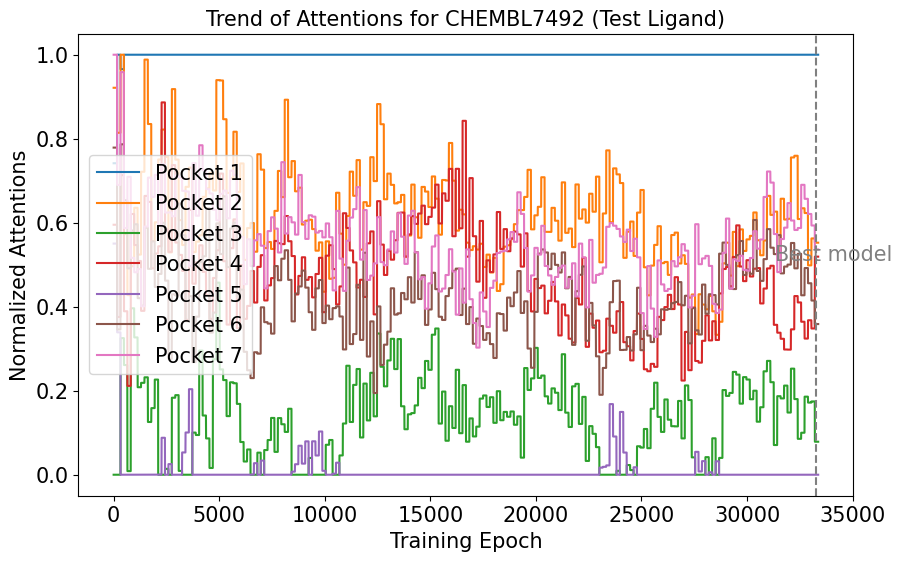

In [7]:
import matplotlib.pyplot as plt
import torch

# 创建一个图形窗口
fig, ax = plt.subplots(figsize=(10, 6))
fontsize = 15

# 绘制每个张量的走势，并添加标签
for i, tensor in enumerate(pocket_epoch_attention_list):
    label = f'Pocket {i+1}'
    ax.plot(tensor.detach().cpu().numpy(), label=label)

# 找到最大值对应的索引
max_index = len(pocket_epoch_attention_list[0])
# 在x=x最大值减100处绘制竖虚线
ax.axvline(x=max_index - 100, color='gray', linestyle='--')
# 标注“Best model”文本
ax.text(1.025*(max_index - 100), 0.5, "Best model", fontsize=fontsize, color='gray', rotation=0, va='bottom', ha='center')
    
# 设置图例
ax.legend(fontsize=fontsize, loc='center left')

# 设置图形标题和轴标签
ax.set_title(f"Trend of Attentions for {cpd} (Test Ligand)", fontsize=fontsize)
ax.set_xlabel("Training Epoch", fontsize=fontsize)
ax.set_ylabel("Normalized Attentions", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)  # X轴刻度字体大小为8
ax.tick_params(axis='y', labelsize=fontsize)  # Y轴刻度字体大小为10

# 显示图形
plt.show()


# Save attention for ligands with native structures

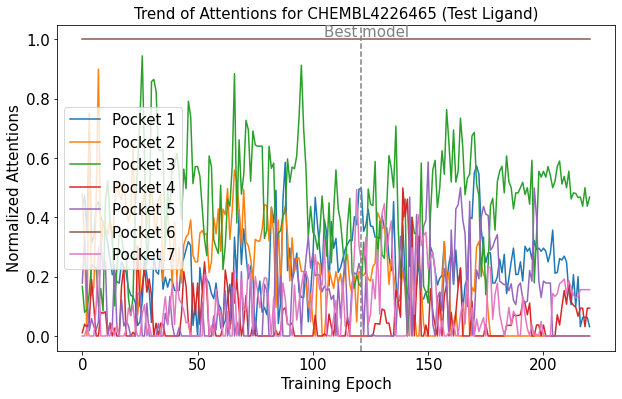

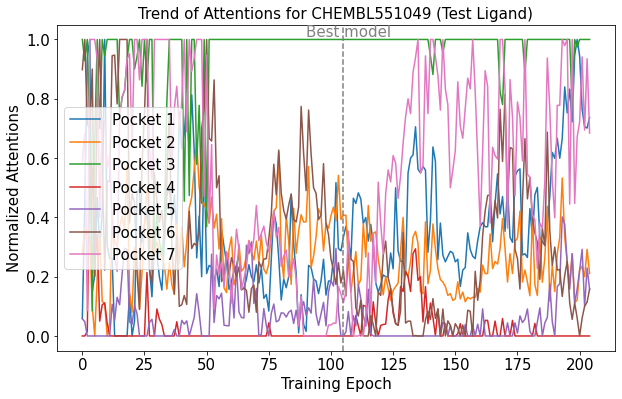

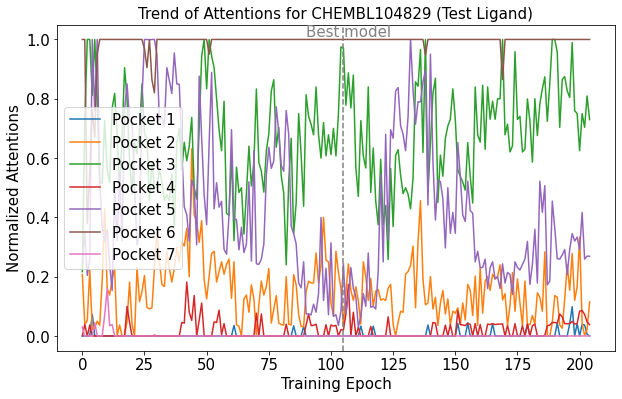

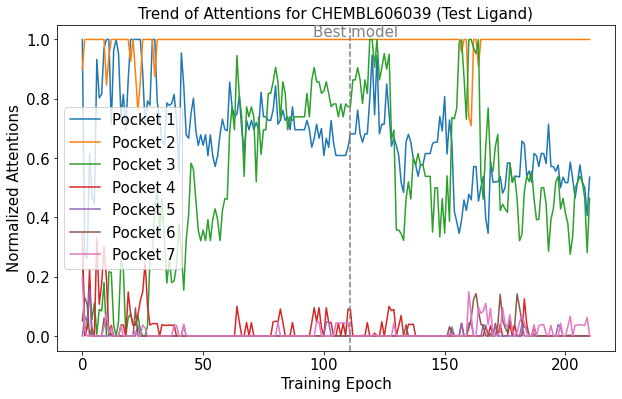

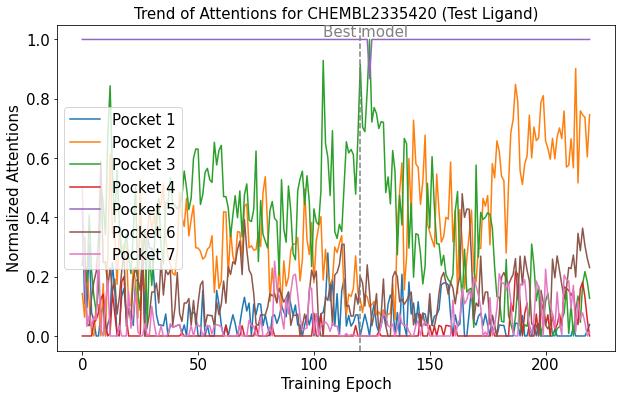

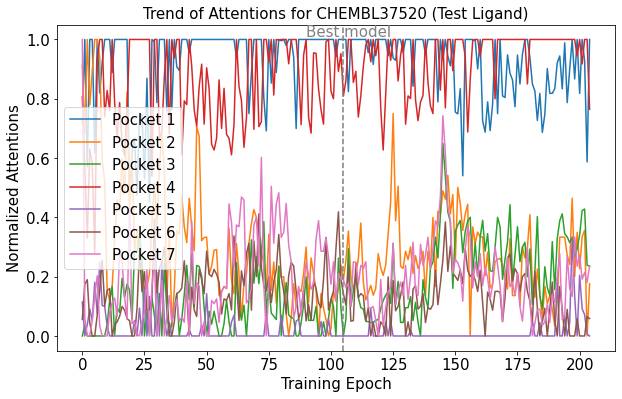

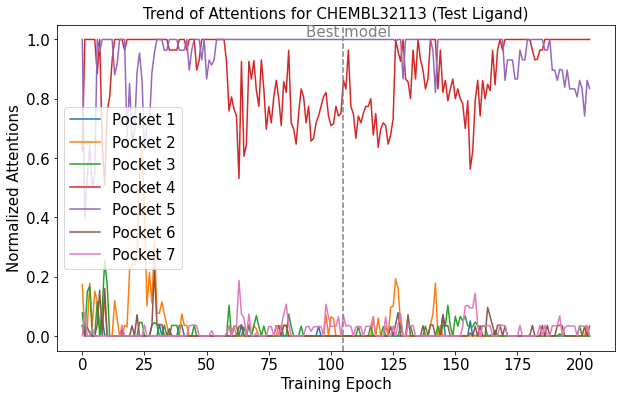

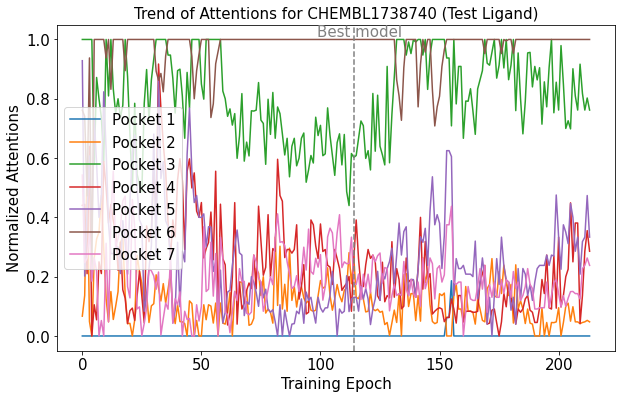

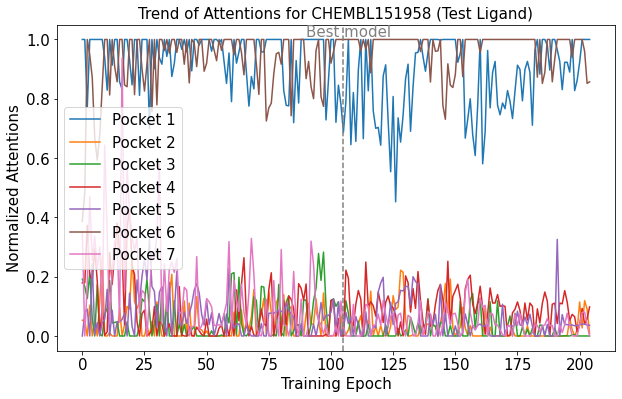

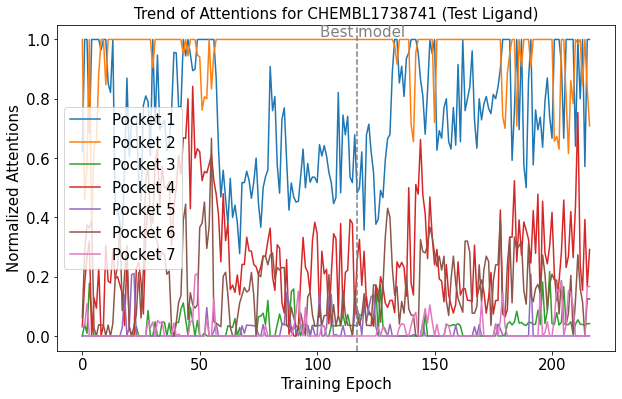

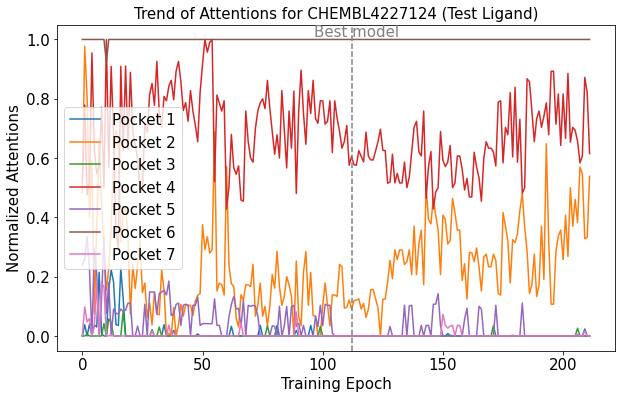

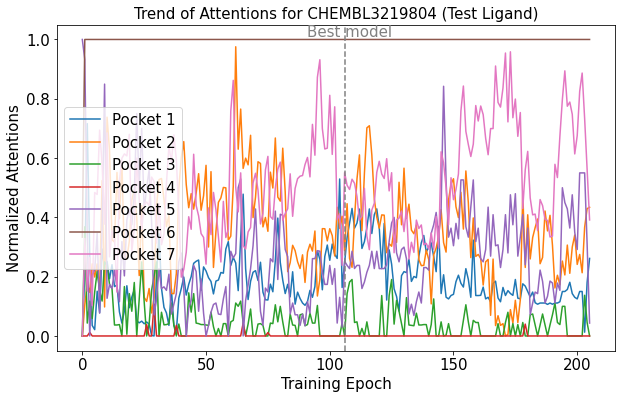

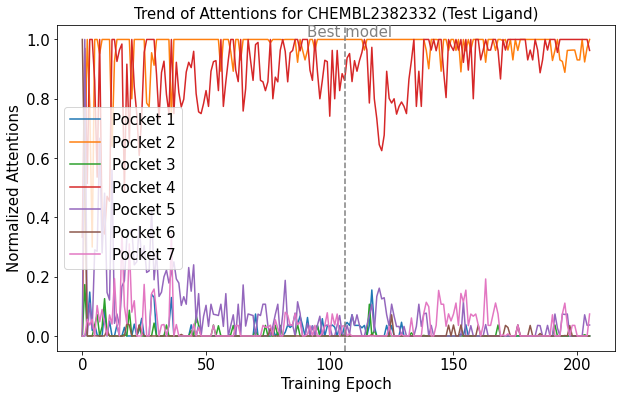

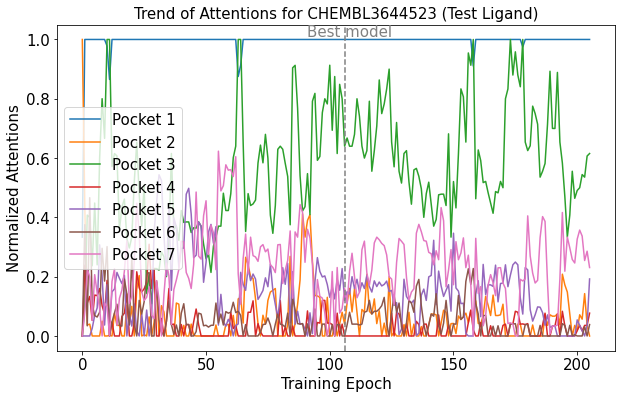

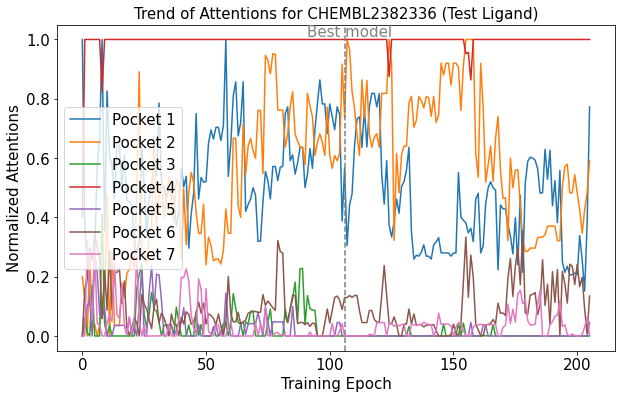

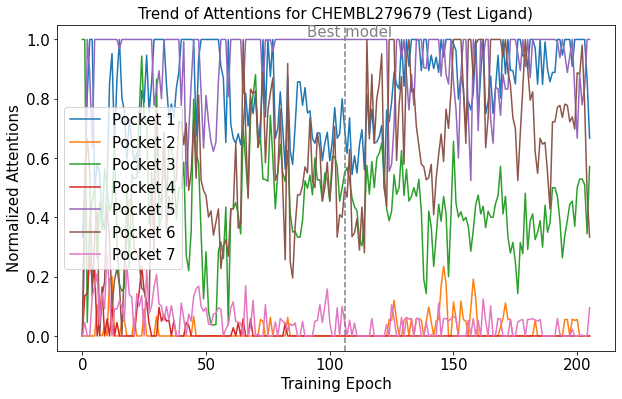

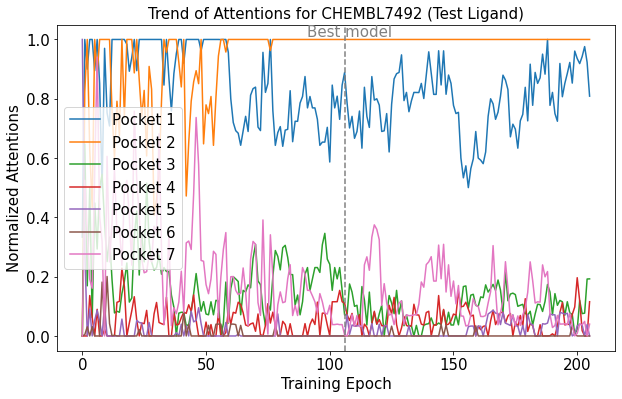

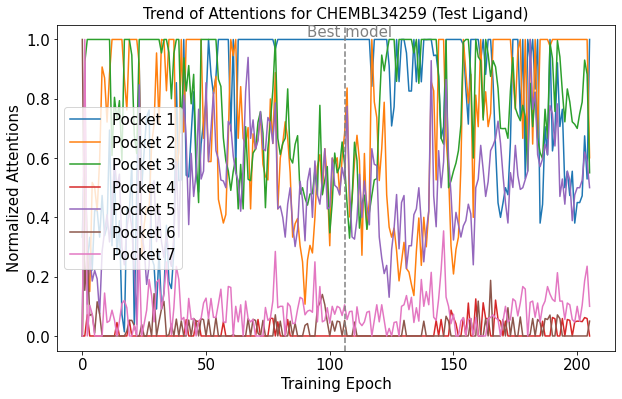

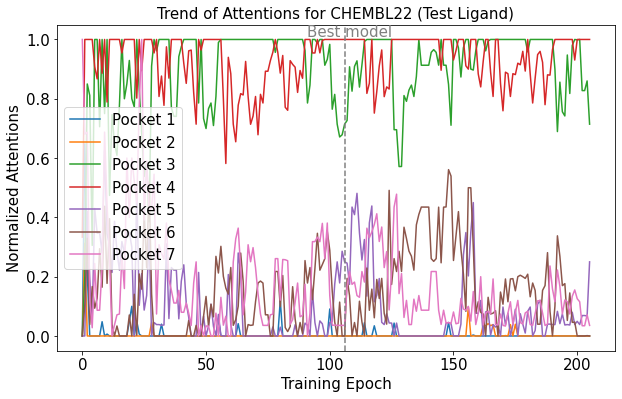

In [8]:
pocket_dir = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/attention/'
attn_dir = f"{result_path[:-7]}data/"
set_list = ['test', 'train_1', 'val', 'train_3', 'train_4', 'train_5'] # fold 2 is the best cross-validation fold
file_list = os.listdir(pocket_dir)
data_path = f"{result_path[:-7]}data"
if not os.path.exists(data_path):
    os.makedirs(data_path)

def normalize_tensor_list(tensor_list):
    normalized_list = []
    for tensor in tensor_list:
        min_val = torch.min(tensor)
        max_val = torch.max(tensor)
        normalized_tensor = (tensor - min_val) / (max_val - min_val)
        normalized_list.append(normalized_tensor)
    return normalized_list

def save_attn_fig(attn_path_list, attention_dict, train):
    train_ligand_list = [x.split('_')[2] for x in attn_path_list] if train else [x.split('_')[1] for x in attn_path_list]
    for attn_path in attn_path_list:
        cpd = attn_path.split('_')[2] if train else attn_path.split('_')[1]
        prefix = '_'.join(map(str, attn_path.split('_')[:2])) if train else attn_path.split('_')[0]
        first_key = next(iter(attention_dict))
        epochs = len(attention_dict[first_key])
        epoch_total_attention_list, pocket_num = [], 7
        for epoch in range(epochs):
            epoch_total_attention = 0
            for key, value in attention_dict.items():
                if epoch >= len(value):
                    continue
                if key == cpd and value[epoch].shape[0] == pocket_num:
                    epoch_total_attention += value[epoch].sum(0)
                    epoch_total_attention_list.append(epoch_total_attention)
        epoch_total_attention_list = normalize_tensor_list(epoch_total_attention_list)
        pocket_epoch_attention_list = [torch.stack([tensor[i] for tensor in epoch_total_attention_list]) for i in range(pocket_num)]
        
        # 创建一个图形窗口
        fig, ax = plt.subplots(figsize=(10, 6))
        fontsize = 15
        
        # 找到最大值对应的索引
        max_index = len(pocket_epoch_attention_list[0])

        # 绘制每个张量的走势，并添加标签
        best_pocket_attn_list = []
        for i, tensor in enumerate(pocket_epoch_attention_list):
            label = f'Pocket {i+1}'
            y = tensor.detach().cpu().numpy()
            ax.plot(y, label=label)
            best_pocket_attn_list.append(y[:max_index-100].mean())
        
        # 获取参与训练得到最佳模型的口袋注意力次序
        sorted_indices = sorted(range(len(best_pocket_attn_list)), key=lambda i: best_pocket_attn_list[i], reverse=True)
        sorted_indices = [index + 1 for index in sorted_indices]
        result_string = '_'.join(map(str, [prefix, cpd, 'Attention', 'Pocket'])) + '_' + '_'.join(map(str, sorted_indices)) + '.png'
        
        # 在x=x最大值减100处绘制竖虚线
        ax.axvline(x=max_index - 100, color='gray', linestyle='--')
        # 标注“Best model”文本
        ax.text(1.02*(max_index - 100), 1, "Best model", fontsize=fontsize, color='gray', rotation=0, va='bottom', ha='center')

        # 设置图例
        ax.legend(fontsize=fontsize, loc='center left')

        # 设置图形标题和轴标签
        ax.set_title(f"Trend of Attentions for {cpd} (Test Ligand)", fontsize=fontsize)
        ax.set_xlabel("Training Epoch", fontsize=fontsize)
        ax.set_ylabel("Normalized Attentions", fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=fontsize)  # X轴刻度字体大小为8
        ax.tick_params(axis='y', labelsize=fontsize)  # Y轴刻度字体大小为10

        # 显示图形
        plt.savefig(f"{result_path[:-7]}data/{result_string}")
        plt.show()
        plt.close()

train_attn_path_list = [x for x in file_list if x.split('_')[3] == 'Attention' and x.split('_')[0] == 'train']
val_attn_path_list = [x for x in file_list if x.split('_')[2] == 'Attention' and x.split('_')[0] == 'val']
test_attn_path_list = [x for x in file_list if x.split('_')[2] == 'Attention' and x.split('_')[0] == 'test']
train_native_path_list = [x for x in file_list if x.split('_')[3][0].islower() or x.split('_')[3][0].isdigit() and x.split('_')[0] == 'train']
val_native_path_list = [x for x in file_list if x.split('_')[2][0].islower() or x.split('_')[2][0].isdigit() and x.split('_')[0] == 'val']
test_native_path_list = [x for x in file_list if x.split('_')[2][0].islower() or x.split('_')[2][0].isdigit() and x.split('_')[0] == 'test']
save_attn_fig(train_attn_path_list, train_attention_dict, train=True)
save_attn_fig(val_attn_path_list, val_attention_dict, train=False)
save_attn_fig(test_attn_path_list, test_attention_dict, train=False)

# Calculate IoU

In [13]:
attn_dir = f"{result_path[:-7]}data/"
set_list = ['test', 'train_1', 'val', 'train_3', 'train_4', 'train_5'] # fold 2 is the best cross-validation fold
file_list = os.listdir(pocket_dir)
attn_list = os.listdir(attn_dir)
IoU_th_list = [1/2, 2/3, 3/4, 4/5]

def is_nested_list(lst):
    for item in lst:
        if isinstance(item, list):
            return True
    return False

def generate_pocket_dict(path_list):
    output_dict = {}
    head_len = 2 if path_list[0].split('_')[0] == 'train' else 1
    for item in path_list:
        key = item.split('_')[head_len]
        pocket_list = item.split('.')[0].split('_')[head_len + 3:]
        if key in output_dict.keys():
            if is_nested_list(output_dict[key]):
                output_dict[key].append(pocket_list)
            else: 
                output_dict[key] = [output_dict[key]]
                output_dict[key].append(pocket_list)
        else:
            output_dict[key] = pocket_list
    return output_dict

def average_list_len(list_dict):
    total_length, counter = 0, 0
    num_keys = len(list_dict.keys())
    for key, value in list_dict.items():
        if is_nested_list(value):
            for lst in value:
                total_length += len(lst)
                counter += 1
        else:
            total_length += len(value)
            counter += 1
    average_length = total_length / counter
    return average_length

def calculate_IoU(pred_dict, label_dict, IoU_th_list):
    IoU_list = []
    for key in pred_dict.keys():
        label_pocket_lists = label_dict[key]
        label_pockets = set()
        if is_nested_list(label_pocket_lists):
            IoU_one_key = 0
            for lst in label_pocket_lists:
#                 label_pockets = label_pockets.union(set(lst))
                label_pockets = set(lst)
                pred_pockets = set(list(filter(lambda item: item != "7", pred_dict[key]))[:len(label_pockets)])
                intersection = label_pockets.intersection(pred_pockets)
                union = label_pockets.union(pred_pockets)
                IoU_one_complex = len(intersection) / len(union)
                print(key, label_pockets, pred_pockets, intersection, union, len(intersection) / len(union))
                IoU_list.append(IoU_one_complex)
        else:
            label_pockets = set(label_pocket_lists)
            pred_pockets = set(list(filter(lambda item: item != "7", pred_dict[key]))[:len(label_pockets)])
            intersection = label_pockets.intersection(pred_pockets)
            union = label_pockets.union(pred_pockets)
            IoU_one_key = len(intersection) / len(union)
            print(key, label_pockets, pred_pockets, intersection, union, IoU_one_key)
            IoU_list.append(IoU_one_key)
    print(IoU_list)
    screen_list = []
    for th in IoU_th_list:
        screen_list.append(len([num for num in IoU_list if num >= th]))
    mean_IoU = sum(IoU_list)/len(IoU_list)
    return mean_IoU, screen_list
        
train_attn_path_list = [x for x in attn_list if x.split('_')[3] == 'Attention' and x.split('_')[0] == 'train']
val_attn_path_list = [x for x in attn_list if x.split('_')[2] == 'Attention' and x.split('_')[0] == 'val']
test_attn_path_list = [x for x in attn_list if x.split('_')[2] == 'Attention' and x.split('_')[0] == 'test']
train_native_path_list = [x for x in file_list if x.split('_')[3][0].islower() or x.split('_')[3][0].isdigit() and x.split('_')[0] == 'train']
val_native_path_list = [x for x in file_list if x.split('_')[2][0].islower() or x.split('_')[2][0].isdigit() and x.split('_')[0] == 'val']
test_native_path_list = [x for x in file_list if x.split('_')[2][0].islower() or x.split('_')[2][0].isdigit() and x.split('_')[0] == 'test']
train_ligand_list = [x.split('_')[2] for x in train_attn_path_list]
val_ligand_list = [x.split('_')[1] for x in val_attn_path_list]
test_ligand_list = [x.split('_')[1] for x in test_attn_path_list]
train_attn_pocket_list = generate_pocket_dict(train_attn_path_list)
val_attn_pocket_list = generate_pocket_dict(val_attn_path_list)
test_attn_pocket_list = generate_pocket_dict(test_attn_path_list)
train_native_pocket_list = generate_pocket_dict(train_native_path_list)
val_native_pocket_list = generate_pocket_dict(val_native_path_list)
test_native_pocket_list = generate_pocket_dict(test_native_path_list)
train_IoU, train_IoU_th = calculate_IoU(train_attn_pocket_list, train_native_pocket_list, IoU_th_list)
val_IoU, val_IoU_th = calculate_IoU(val_attn_pocket_list, val_native_pocket_list, IoU_th_list)
test_IoU, test_IoU_th = calculate_IoU(test_attn_pocket_list, test_native_pocket_list, IoU_th_list)
print(train_native_pocket_list)
print(len(train_native_path_list), len(val_native_path_list), len(test_native_path_list))
print(train_ligand_list, val_ligand_list, test_ligand_list)
print(average_list_len(train_native_pocket_list), average_list_len(val_native_pocket_list), average_list_len(test_native_pocket_list))
print(train_IoU_th, val_IoU_th, test_IoU_th)
print(train_IoU, val_IoU, test_IoU)

CHEMBL2335420 {'2', '4', '3', '6', '1'} {'2', '3', '6', '1', '5'} {'2', '3', '6', '1'} {'2', '4', '3', '6', '1', '5'} 0.6666666666666666
CHEMBL4227124 {'2', '3', '6', '1'} {'5', '4', '6', '2'} {'2', '6'} {'2', '4', '3', '6', '1', '5'} 0.3333333333333333
CHEMBL1738740 {'2', '3', '1', '4'} {'4', '3', '6', '5'} {'4', '3'} {'2', '4', '3', '6', '1', '5'} 0.3333333333333333
CHEMBL1738741 {'2', '3', '1', '4'} {'2', '6', '1', '4'} {'2', '1', '4'} {'2', '4', '3', '6', '1'} 0.6
CHEMBL551049 {'2', '3', '1', '4'} {'2', '3', '6', '1'} {'2', '3', '1'} {'2', '4', '3', '6', '1'} 0.6
CHEMBL551049 {'2', '3', '1', '4'} {'2', '3', '6', '1'} {'2', '3', '1'} {'2', '4', '3', '6', '1'} 0.6
CHEMBL606039 {'2', '3', '6', '1'} {'2', '3', '1', '4'} {'2', '3', '1'} {'2', '4', '3', '6', '1'} 0.6
CHEMBL104829 {'2', '3', '1', '4'} {'2', '3', '6', '5'} {'2', '3'} {'2', '4', '3', '6', '1', '5'} 0.3333333333333333
CHEMBL104829 {'2', '4', '3', '6', '1'} {'2', '4', '3', '6', '5'} {'2', '3', '6', '4'} {'2', '4', '3', '6', '

# Draw correlation figure between RMSD and attention values

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pymol, os

native_protein_template = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/pdb_with_activity/test/{}.pdb'
native_ligand_template = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/pdb_with_activity/test/{}_{}.pdbqt'
dock_protein_path = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/protein/pdb1boz.pdbqt'
dock_ligand_template = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/1boz/vina/test/pocket_{}/{}.pdbqt'
combine_output_template = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/pdb_with_activity/test/docking_results/{}.pdb'
pocket_dir = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/attention/'
save_path = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/figures/correlation_rmsd_attention/correlation_rmsd_attention_test.png'
file_list = os.listdir(pocket_dir)
test_native_path_list = [x for x in file_list if (len(x.split('_')) > 2) and (x.split('_')[2][0].islower() or x.split('_')[2][0].isdigit() and x.split('_')[0] == 'test')]
attention_dict = test_attention_dict
fontsize = 16

def normalize_tensor_list(tensor_list):
    normalized_list = []
    for tensor in tensor_list:
        min_val = torch.min(tensor)
        max_val = torch.max(tensor)
        normalized_tensor = (tensor - min_val) / (max_val - min_val)
        normalized_list.append(normalized_tensor)
    return normalized_list

def normalize_list(numbers):
    # Calculate the minimum and maximum values in the list
    min_value = min(numbers)
    max_value = max(numbers)
    
    # Calculate the range of values
    value_range = max_value - min_value
    
    # Normalize each number in the list
    normalized_numbers = [(x - min_value) / value_range for x in numbers]
    
    return normalized_numbers

def merge_pdb_files(pdb_file1, pdb_file2, output_file):
    # Initialize PyMOL
    pymol.finish_launching(['pymol', '-qc'])
    
    # Load PDB files into separate objects
    pymol.cmd.load(pdb_file1, 'obj1')
    pymol.cmd.load(pdb_file2, 'obj2', state=1)
    pymol.cmd.remove('hydrogens')

    chain_ids = pymol.cmd.get_chains('obj1')
    first_chain_id = chain_ids[0]
    pymol.cmd.select('first_chain_sele', f'chain {first_chain_id} and obj1')
    pymol.cmd.create('first_chain', 'first_chain_sele')
    
    # Merge the objects into a single object
    pymol.cmd.create('merged', 'first_chain or obj2')

    # Save the merged complex to a new PDB file
    pymol.cmd.save(output_file, 'merged')

    # Delete the temporary objects
    pymol.cmd.delete('all')

def align_and_calculate_rmsd(native_protein, native_ligand, native_ligand_pdb, native_combine_path, dock_protein, dock_ligand, dock_ligand_pdb, dock_combine_path):
    # Initialize PyMOL
    pymol.finish_launching(['pymol', '-qc'])
    
    # only need to run once
#     merge_pdb_files(native_protein, native_ligand, native_combine_path)
#     merge_pdb_files(dock_protein, dock_ligand, dock_combine_path)
    
    # Load reference and target complexes
    pymol.cmd.load(native_combine_path, 'native_complex')
    pymol.cmd.load(dock_combine_path, 'dock_complex')

    # Define the 'ligand' selection for both reference and target complexes
    pymol.cmd.select('ligand_native', "resn UNL and native_complex")
    pymol.cmd.select('ligand_dock', 'resn UNL and dock_complex')
    
    # Align the target complex to the reference complex
    pymol.cmd.align('native_complex', 'dock_complex')

    # Calculate the RMSD of the ligands in the two complexes
    rmsd = pymol.cmd.rms_cur('ligand_native', 'ligand_dock')

    # Delete the temporary objects
    pymol.cmd.delete('all')

    return rmsd

mean_attention_list, rmsd_list_all = [], []
test_native_path_list.sort(reverse=True)
for i, test_native_path in enumerate(test_native_path_list):
    cid, pdb = test_native_path.split('_')[1:3]
    # 获取平均注意力值
    epoch_total_attention_list, pocket_num = [], 7
    for epoch in range(epochs):
        if epoch >= 0:
            epoch_total_attention = 0
            for key, value in attention_dict.items():
        #         if value[epoch].shape[0] == pocket_num:
                if key == cid:
                    epoch_total_attention += value[epoch].sum(0)
            epoch_total_attention_list.append(epoch_total_attention)
    epoch_total_attention_list = normalize_tensor_list(epoch_total_attention_list)
    pocket_epoch_attention_list = [torch.stack([tensor[i] for tensor in epoch_total_attention_list]) for i in range(pocket_num)]
    mean_attention = [(sum(lst)/len(lst)).item() for lst in pocket_epoch_attention_list]
    mean_attention_list.append(mean_attention)
    
    # # 获取rmsd值
    # rmsd_list = []
    # for pocket_idx in range(7):
    #     # 用于计算RMSD的两个PDBQT文件的路径
    #     native_protein_path = native_protein_template.format(pdb)
    #     native_ligand_path = native_ligand_template.format(pdb, cid)
    #     native_ligand_pdb = combine_output_template.format(cid+'_native')
    #     native_combine_path = combine_output_template.format(pdb+'_'+cid)
    #     dock_ligand_path = dock_ligand_template.format(pocket_idx+1, cid)
    #     dock_ligand_pdb = combine_output_template.format(cid+f'_Pocket_{pocket_idx+1}')
    #     dock_combine_path = combine_output_template.format('1boz_'+cid+f'_Pocket_{pocket_idx+1}')
        
    #     if not os.path.exists(native_ligand_path):
    #         native_protein_path = native_protein_template.format(pdb+'-A')
    #         native_ligand_path = native_ligand_template.format(pdb+'-A', cid)
    #     if not os.path.exists(native_ligand_path):
    #         native_protein_path = native_protein_template.format(pdb+'-1')
    #         native_ligand_path = native_ligand_template.format(pdb+'-1', cid)
    #     # 调用函数并输出结果
    #     rmsd_result = align_and_calculate_rmsd(native_protein_path, native_ligand_path, native_ligand_pdb, native_combine_path, 
    #                                            dock_protein_path, dock_ligand_path, dock_ligand_pdb, dock_combine_path)
    #     rmsd_list.append(rmsd_result)
    # rmsd_list_all.append(rmsd_list)
    # print(rmsd_list)

# Only need to be calculated once
rmsd_list_all = [
[2.3547465801239014, 1.7950531244277954, 6.497983932495117, 1.5163503885269165, 18.321575164794922, 2.5799455642700195, 2.5747580528259277],
[3.941627025604248, 3.4934425354003906, 6.064568042755127, 3.2731752395629883, 18.56866455078125, 4.128236770629883, 4.151376724243164],
[9.71252155303955, 7.624856472015381, 10.563976287841797, 6.641691207885742, 20.117582321166992, 7.596014022827148, 12.872865676879883],
[9.2824068069458, 7.380036354064941, 10.122110366821289, 6.425115585327148, 19.585060119628906, 7.3578782081604, 12.426619529724121],
[9.178081512451172, 7.310100078582764, 10.033012390136719, 6.314840793609619, 19.552322387695312, 7.289416313171387, 12.329950332641602],
[8.063596725463867, 8.072662353515625, 8.132330894470215, 5.315450191497803, 15.958117485046387, 8.063282012939453, 8.035558700561523],
[10.76185417175293, 11.364062309265137, 11.313240051269531, 10.152036666870117, 22.51775360107422, 10.713692665100098, 11.276593208312988],
[5.943929195404053, 6.920995235443115, 6.843271255493164, 5.282972812652588, 18.59960174560547, 6.099219799041748, 6.988763332366943],
[5.441972255706787, 6.336720943450928, 6.262314796447754, 4.740637302398682, 18.459592819213867, 5.597292423248291, 6.384758949279785]
]

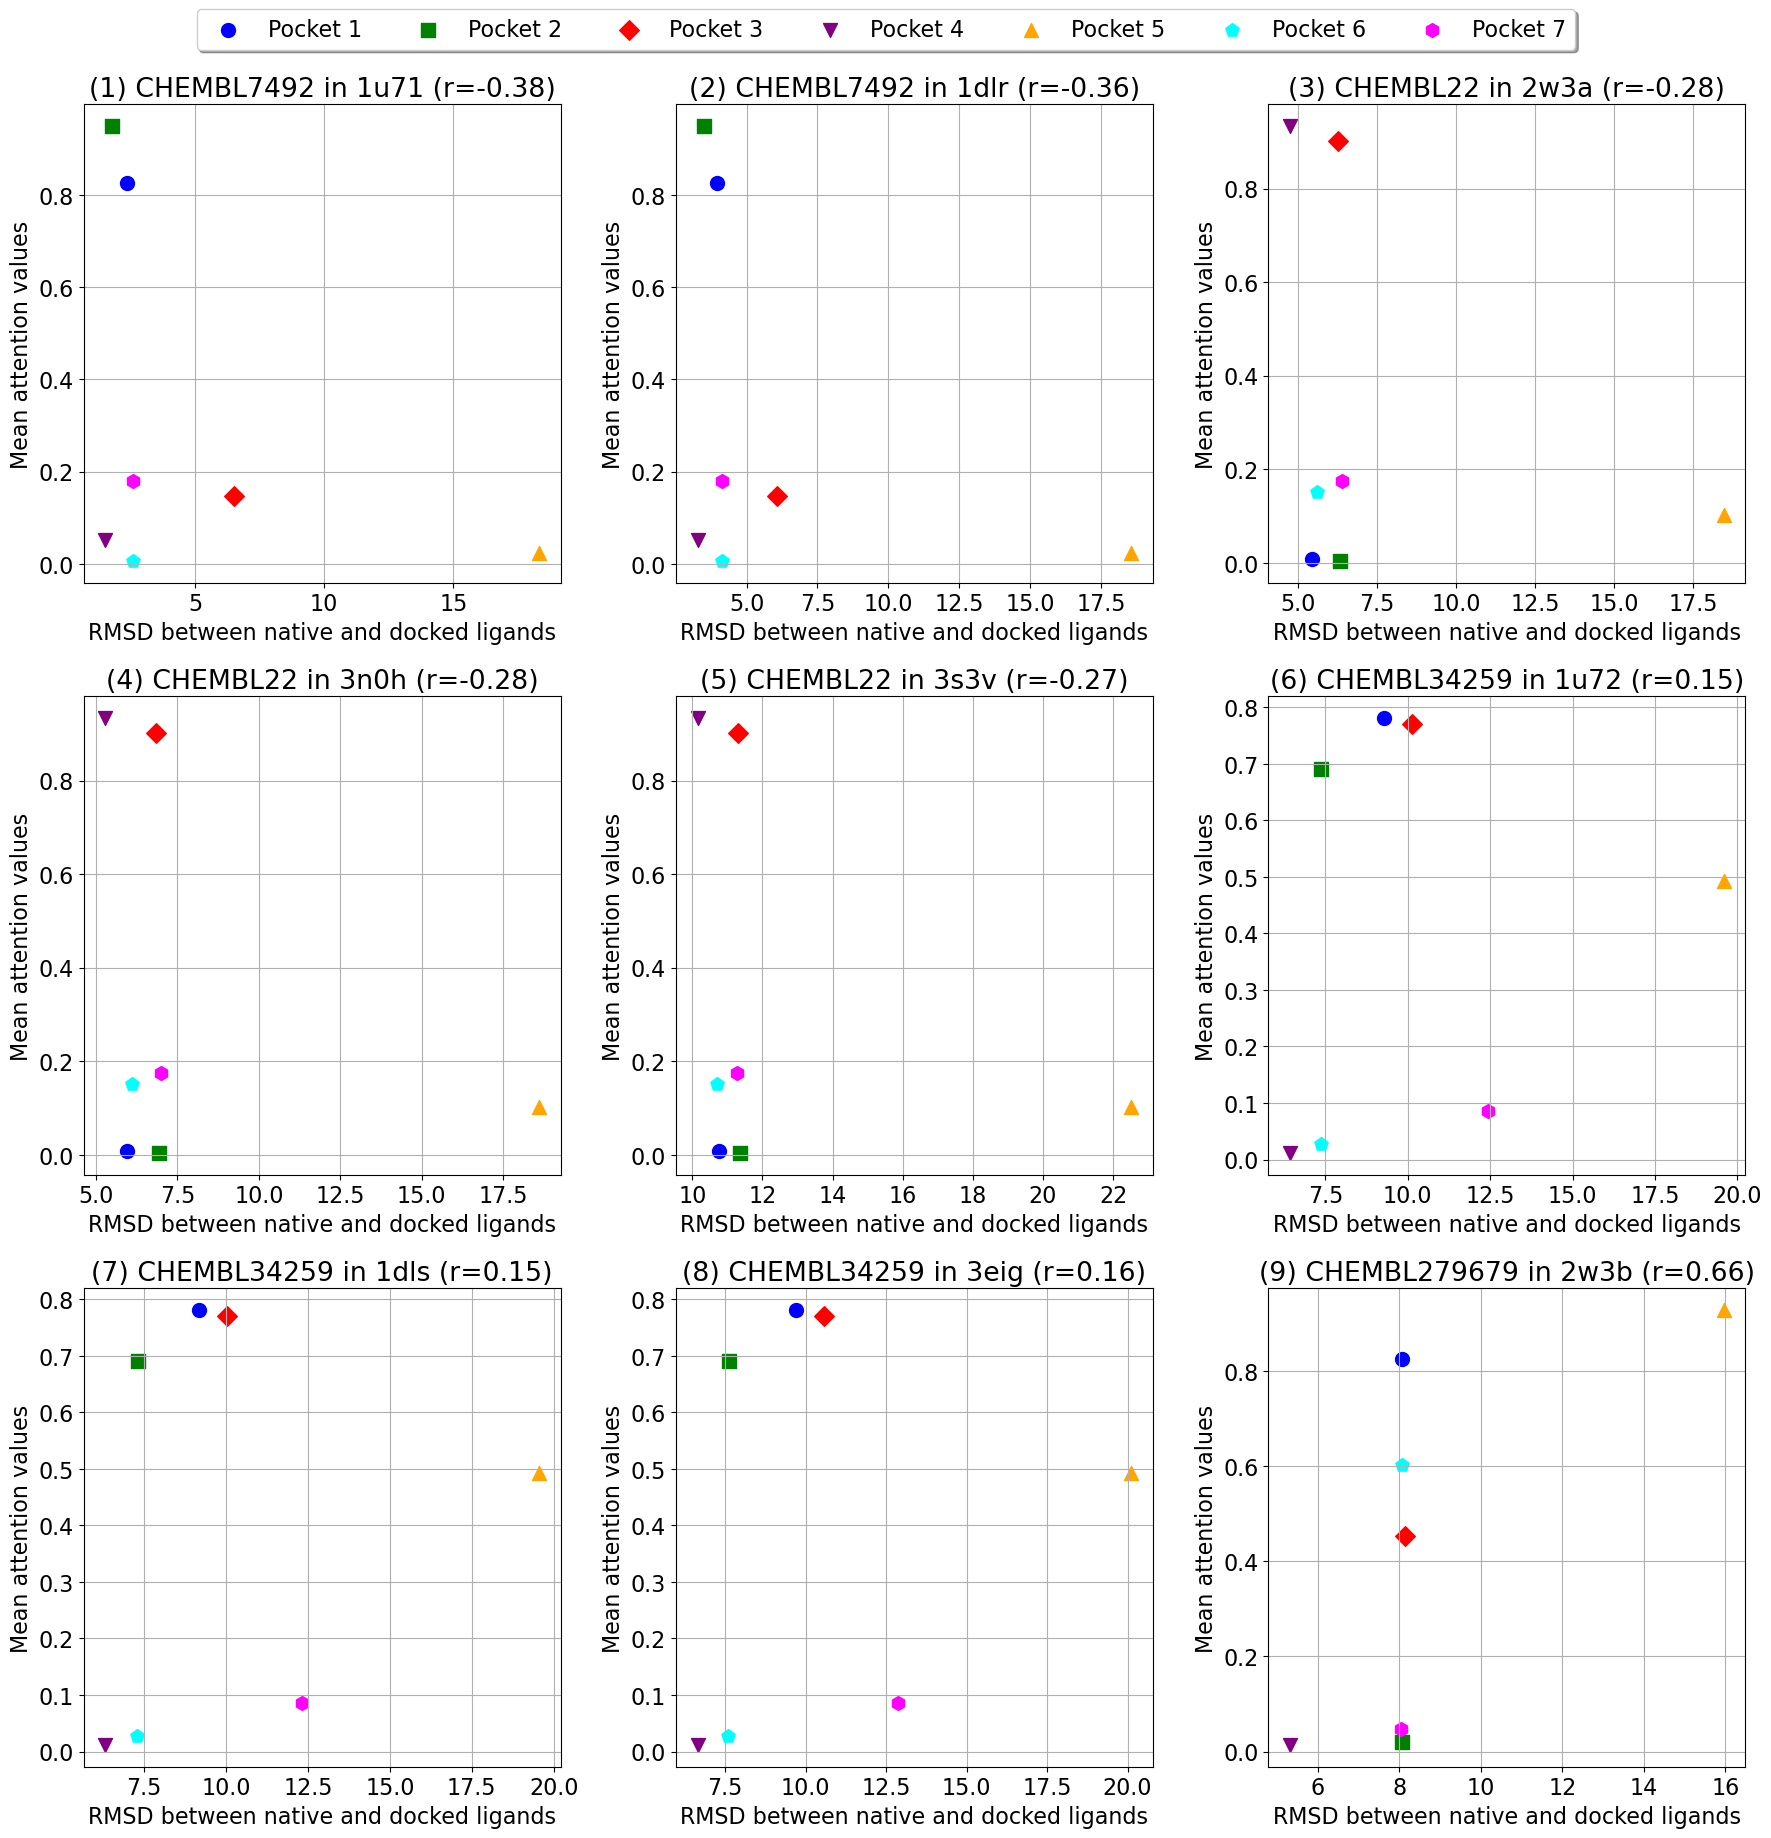

Average r: -0.04823430875615817


In [35]:
from scipy.interpolate import make_interp_spline

# 计算相关系数并排序索引
r_list = []
for mean_attention, rmsd_list, test_native_path in zip(mean_attention_list, rmsd_list_all, test_native_path_list):
    list1 = rmsd_list
    list2 = mean_attention
    pearson_corr, _ = pearsonr(list1, list2)
    r_list.append(pearson_corr)

sorted_indices = np.argsort(r_list)  # 按相关系数排序的索引

# 创建图形和子图
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
plt.rcParams.update({'font.size': fontsize})

# 存储图例的标签和散点图句柄
legend_labels, scatter_handles = [], []

for i, idx in enumerate(sorted_indices):
    mean_attention, rmsd_list, test_native_path = mean_attention_list[idx], rmsd_list_all[idx], test_native_path_list[idx]
    cid, pdb = test_native_path.split('_')[1:3]
    row, col = divmod(i, 3)
    ax = axs[row, col]

    list1 = rmsd_list
    list2 = mean_attention

    pearson_corr, _ = pearsonr(list1, list2)

    markers = ['o', 's', 'D', 'v', '^', 'p', 'h']
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

    for pid in range(7):
        sc = ax.scatter(list1[pid], list2[pid], label=f"Pocket {pid+1}", marker=markers[pid], color=colors[pid], s=100)
        if i == 0:
            scatter_handles.append(sc)
            legend_labels.append(f"Pocket {pid+1}")
    ax.set_xlabel('RMSD between native and docked ligands', fontsize=fontsize)
    ax.set_ylabel('Mean attention values', fontsize=fontsize)
    ax.set_title(f'({i+1}) {cid} in {pdb} (r={pearson_corr:.2f})')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid(True)
    plt.tight_layout()

fig.legend(handles=scatter_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=7, fancybox=True, shadow=True, fontsize=fontsize)

dpi = 300
save_path = 'output.png'
plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
plt.show()

print('Average r:', sum(r_list) / len(r_list))

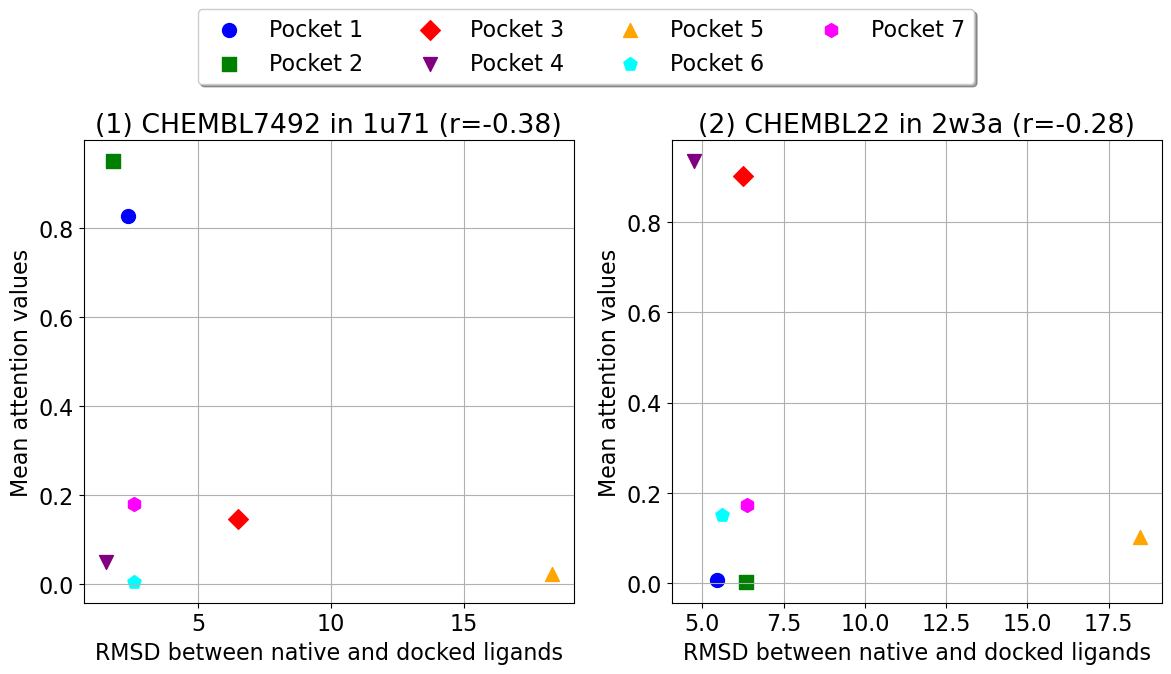

Average r: -0.04823430875615817


In [34]:
# 创建图形和子图
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.rcParams.update({'font.size': fontsize})

# 存储图例的标签和散点图句柄
legend_labels, scatter_handles = [], []

for i, idx in enumerate(sorted_indices[[0,2]]):
    mean_attention, rmsd_list, test_native_path = mean_attention_list[idx], rmsd_list_all[idx], test_native_path_list[idx]
    cid, pdb = test_native_path.split('_')[1:3]
    row, col = divmod(i, 3)
    ax = axs[col]

    list1 = rmsd_list
    list2 = mean_attention

    pearson_corr, _ = pearsonr(list1, list2)

    markers = ['o', 's', 'D', 'v', '^', 'p', 'h']
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

    for pid in range(7):
        sc = ax.scatter(list1[pid], list2[pid], label=f"Pocket {pid+1}", marker=markers[pid], color=colors[pid], s=100)
        if i == 0:
            scatter_handles.append(sc)
            legend_labels.append(f"Pocket {pid+1}")
    ax.set_xlabel('RMSD between native and docked ligands', fontsize=fontsize)
    ax.set_ylabel('Mean attention values', fontsize=fontsize)
    ax.set_title(f'({i+1}) {cid} in {pdb} (r={pearson_corr:.2f})')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid(True)

    plt.tight_layout()

fig.legend(handles=scatter_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True, fontsize=fontsize)

dpi = 300
save_path = 'output.png'
plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
plt.show()

print('Average r:', sum(r_list) / len(r_list))

# Save baseline results

In [ ]:
result_root = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/baseline'
model_list = ['GCN', 'GAT', 'gin_supervised_contextpred', 'MPNN', 'Weave', 'NF', 'AttentiveFP', 'AFSE_AttentiveFP']
metric_list = ['R', 'RMSE', 'Tau-B']
target_list = ['CHEMBL3820', 'CHEMBL4422', 'CHEMBL235', 'CHEMBL202', 'CHEMBL3976', 'CHEMBL333', 'CHEMBL2971', 'CHEMBL279']
column_list = ['Models']
for metric in metric_list:
    for target in target_list:
        column_list.append(f'{metric}_{target}')
print(len(column_list))
result_df = pd.DataFrame(columns=column_list)
for target in target_list:
    for assay in os.listdir(f'{result_root}/{target}'):
        for model in model_list:
            for tial in os.listdir(f'{result_root}/{target}/{assay}/{model}'):
                best_cross_rmse = 1e9
                for cross in os.listdir(f'{result_root}/{target}/{assay}/{model}/{tial}'):
                    result_dir = f'{result_root}/{target}/{assay}/{model}/{tial}/{cross}'
                    metric_df = pd.read_csv(f'{result_dir}/metrics.csv')
                    Val_stop_rmse = metric_df.Val_stop_rmse.values
                    if Val_stop_rmse < best_cross_rmse:
                        best_cross_rmse = Val_stop_rmse
                        for metric in metric_list:
                            column = f'{metric}_{target}'
                            if model in result_df['Models'].values:
                                condition = (result_df['Models']==model)
                                result_df.loc[condition, column] = metric_df[metric].values
                            else:
                                init_content_list = [model] + [None] * 24
                                result_df.loc[len(result_df)] = init_content_list
                                result_df.loc[len(result_df)-1, column] = metric_df[metric].values
result_df.to_csv(f'baselines.csv', index=False)

# Read results in the epoch order

In [ ]:
result_path = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/model/20230612_210824_GIGN_fold_2_reweight/result/'
result_list = os.listdir(result_path)
result_list = sorted(result_list, key=lambda x: int(re.search(r'\d+', x).group()))
weight_dict_list, responsible_dict_list, error_dict_list = [], [], []
for file in tqdm(result_list):
    if file.split('_')[-1] == 'weights.json':
        with open(result_path + file, 'r') as f:
            weight_dict = json.load(f)
            weight_dict_list.append(weight_dict)
    if file.split('_')[-1] == 'responsibility.json':
        with open(result_path + file, 'r') as f:
            responsible_dict = json.load(f)
            responsible_dict_list.append(responsible_dict)
    if file.split('_')[-1] == 'error.json':
        with open(result_path + file, 'r') as f:
            error_dict = json.load(f)
            error_dict_list.append(error_dict)

In [ ]:
print(len(weight_dict_list), len(responsible_dict_list), len(error_dict_list))
print(len(weight_dict_list[0]), len(responsible_dict_list[0]), len(error_dict_list[0]))

# Tracking a compound

In [ ]:
cpd_id = 'CHEMBL4759800'
weight_list, responsible_list, error_list = [], [], []
for epoch, weight_dict in tqdm(enumerate(weight_dict_list)):
    weight_list.append(weight_dict[cpd_id])
    responsible_list.append(responsible_dict_list[epoch][cpd_id])
    error_list.append(error_dict_list[epoch][cpd_id])

epoch_weight = np.array(weight_list)
epoch_responsible = np.array(responsible_list)
epoch_error = np.array(error_list)
print(epoch_weight.shape, epoch_responsible.shape, epoch_error.shape)

In [ ]:
epoch_num, pocket_num = epoch_weight.shape
max_total_error = np.max(np.sum(epoch_error, axis=1))
# 计算每一行的最小值和最大值
row_min = np.min(epoch_responsible, axis=1, keepdims=True)
row_max = np.max(epoch_responsible, axis=1, keepdims=True)

# 正则化每一行的数据
epoch_respon_normalized = (epoch_responsible - row_min) / (row_max - row_min)

for pocket in range(pocket_num):
    # 生成样本数据
    x = np.arange(1, epoch_num + 1, 1)
    y_weight = epoch_weight[:, pocket]
    y_respon = epoch_respon_normalized[:, pocket]
    y_error = epoch_error[:, pocket]
    # 删除指定列
    y_other_error = np.delete(epoch_error, pocket, axis=1)
    y_other_error = np.sum(y_other_error, axis=1)
    
    # 拟合模型或函数
    fit_weight = np.polyfit(x, y_weight, deg=10)  # 使用多项式拟合，这里使用一次多项式（线性拟合）
    func_weight = np.poly1d(fit_weight)  # 创建拟合函数对象
    fit_respon = np.polyfit(x, y_respon, deg=10)  # 使用多项式拟合，这里使用一次多项式（线性拟合）
    func_respon = np.poly1d(fit_respon)  # 创建拟合函数对象
    fit_other_error = np.polyfit(x, y_other_error, deg=10)  # 使用多项式拟合，这里使用一次多项式（线性拟合）
    func_other_error = np.poly1d(fit_other_error)  # 创建拟合函数对象
    
    # 创建第一个轴对象
    fig, ax1 = plt.subplots()

    # 绘制第一个曲线和散点
    ax1.scatter(x, y_respon, color='blue', label='Normalized cumulative weights')
    ax1.plot(x, func_respon(x), color='red', label='Fit function for weights')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Weight values', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(f'Pocket {pocket+1}')
    ax1.set_ylim([-0.1, 1.1])
    
    # 创建第二个纵坐标轴
    ax2 = ax1.twinx()
    
    # 绘制第二个的曲线和散点
    ax2.scatter(x, y_other_error, color='green', label='Total errors of other pockets')
    ax2.plot(x, func_other_error(x), color='orange', label='Fit function for errors')
    ax2.set_ylabel('Error values', color='g')
    ax2.tick_params('y', colors='g')
    ax2.set_ylim([0-0.1*max_total_error, 1.1*max_total_error])
    
    # 设置图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2)
    plt.show()


# Find activity cliffs

In [10]:
import pandas as pd
from itertools import combinations

# 读取CSV文件
file_path = '/home1/yueming/Drug_Discovery/Baselines/GIGN-main/GIGN/data/CHEMBL202/CHEMBL202_pIC50_test.csv'
data = pd.read_csv(file_path)

# 提取SMILES列、ChEMBL_Compound_ID列和pIC50列的数据
smiles_data = data['SMILES']
chembl_ids = data['ChEMBL_Compound_ID']
pIC50_data = data['pIC50']

# 函数用于计算两个字符串之间的字符不同数量
def count_differences(str1, str2):
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

# 创建空列表来存储元素对和对应的pIC50差异
pairs_diff = []

# 遍历SMILES列中的元素对
for i, j in combinations(smiles_data.index, 2):
    diff_count = count_differences(smiles_data[i], smiles_data[j])
    
    # 如果只有一个字符不同，记录差异、pIC50差异和ChEMBL_Compound_ID
    if diff_count == 1:
        pIC50_diff = abs(pIC50_data[i] - pIC50_data[j])
        pairs_diff.append((i, j, pIC50_diff, chembl_ids[i], chembl_ids[j]))

# 按照pIC50差异从大到小排序
sorted_pairs = sorted(pairs_diff, key=lambda x: x[2], reverse=True)

# 打印结果
for i, j, pIC50_diff, chembl_id1, chembl_id2 in sorted_pairs:
    print(f"Elements at indices {i} and {j} have pIC50 difference: {pIC50_diff}")
    print(f"ChEMBL_Compound_ID 1: {chembl_id1}\nChEMBL_Compound_ID 2: {chembl_id2}")
    print(f"SMILES 1: {smiles_data[i]}\nSMILES 2: {smiles_data[j]}\n")


Elements at indices 17 and 108 have pIC50 difference: 3.859652753035271
ChEMBL_Compound_ID 1: CHEMBL23532
ChEMBL_Compound_ID 2: CHEMBL119
SMILES 1: COc1cc(NCc2cnc3nc(N)nc(N)c3c2C)cc(OC)c1OC
SMILES 2: COc1cc(NCc2ccc3nc(N)nc(N)c3c2C)cc(OC)c1OC

Elements at indices 52 and 108 have pIC50 difference: 3.3556593519153077
ChEMBL_Compound_ID 1: CHEMBL23569
ChEMBL_Compound_ID 2: CHEMBL119
SMILES 1: COc1cc(NCc2cnc3nc(N)nc(N)c3c2C)cc(OC)c1
SMILES 2: COc1cc(NCc2ccc3nc(N)nc(N)c3c2C)cc(OC)c1OC

Elements at indices 60 and 63 have pIC50 difference: 2.7528453851188743
ChEMBL_Compound_ID 1: CHEMBL141857
ChEMBL_Compound_ID 2: CHEMBL141648
SMILES 1: C#CCN(Cc1ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc1)c1ccc2nc(N)nc(O)c2c1
SMILES 2: C#CCN(Cc1ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc1)c1ccc2nc(N)nc(N)c2c1

Elements at indices 65 and 67 have pIC50 difference: 2.413734275855269
ChEMBL_Compound_ID 1: CHEMBL141576
ChEMBL_Compound_ID 2: CHEMBL442217
SMILES 1: C=CCN(Cc1ccc(C(=O)NC(CCC(=O)O)C(=O)O)cc1)c1ccc2nc(N)nc(N)c2c1
SMILES 2: C=CCN